In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import decomposition, cluster
sns.set(rc={'figure.figsize' : (10,10)})

**PCA**

In [2]:
arrests_df = pd.read_csv('arrests.csv')
arrests_states = arrests_df[arrests_df.columns[0]].rename('state')
arrests_df = arrests_df.drop(arrests_df.columns[0], axis=1)
arrests_df.describe()
arrests_df = (arrests_df - arrests_df.mean()) / arrests_df.std()
arrests_df.head()

,Murder,Assault,UrbanPop,Rape
0,1.242564,0.782839,-0.520907,-0.003416
1,0.507862,1.106823,-1.211764,2.484203
2,0.071633,1.478803,0.998980,1.042878
3,0.232349,0.230868,-1.073593,-0.184917
4,0.278268,1.262814,1.758923,2.067820


In [3]:
pca = decomposition.PCA()
pca.fit(arrests_df)
p_components = pd.DataFrame(pca.components_.T)
p_components

,0,1,2,3
0,0.535899,0.418181,-0.341233,0.649228
1,0.583184,0.187986,-0.268148,-0.743407
2,0.278191,-0.872806,-0.378016,0.133878
3,0.543432,-0.167319,0.817778,0.089024


In [4]:
projection = pd.DataFrame(pca.transform(arrests_df))
projection.head()

,0,1,2,3
0,0.975660,1.122001,-0.439804,0.154697
1,1.930538,1.062427,2.019500,-0.434175
2,1.745443,-0.738460,0.054230,-0.826264
3,-0.139999,1.108542,0.113422,-0.180974
4,2.498613,-1.527427,0.592541,-0.338559


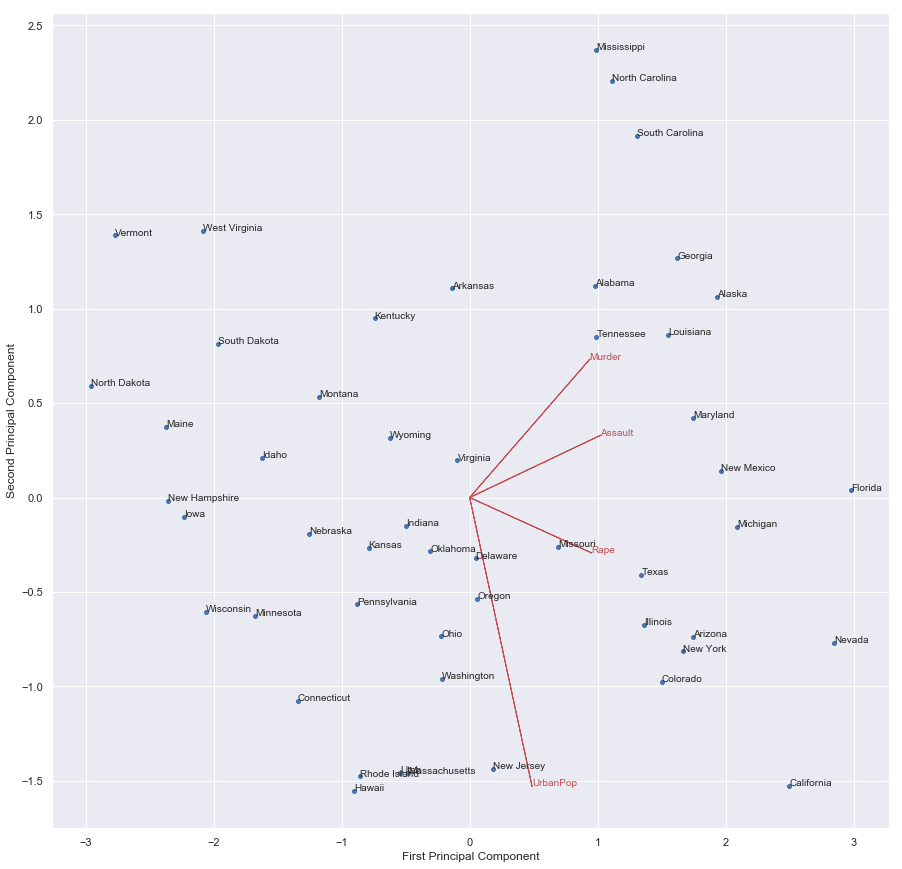

In [5]:
# bi-plot on first 2 principal components

_ = plt.subplots(figsize=(15, 15))
scatter_df = pd.concat([projection, arrests_states], axis=1)

# plot the points
ax = sns.scatterplot(x=0, y=1 ,data=scatter_df)

# label axes
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')

# label the points
for idx, row in scatter_df.iterrows():
    ax.text(row[0], row[1], row['state'])
    
# plot the 'loading vectors'
for idx, row in p_components.iterrows():
    factor = 1.75
    ax.arrow(0,0, row[0] * factor, row[1] * factor, color='r')
    ax.text(row[0] * factor, row[1] * factor, arrests_df.columns[idx], color='r')

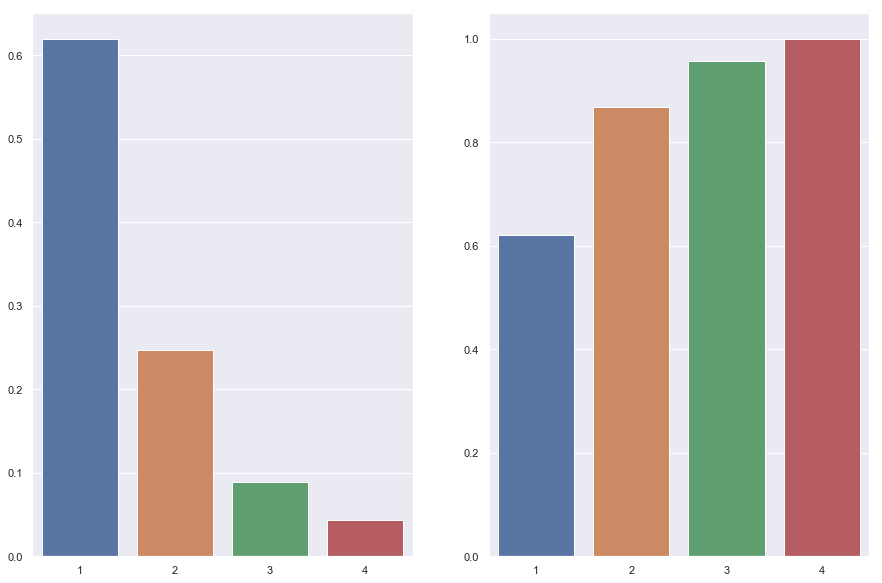

In [14]:
_ ,(ax1, ax2) = plt.subplots(figsize=(15, 10), ncols=2)
sns.barplot(x=np.arange(1,5), y=pca.explained_variance_ratio_, ax=ax1)
sns.barplot(x=np.arange(1,5), y=np.cumsum(pca.explained_variance_ratio_), ax=ax2)

**K-Means**

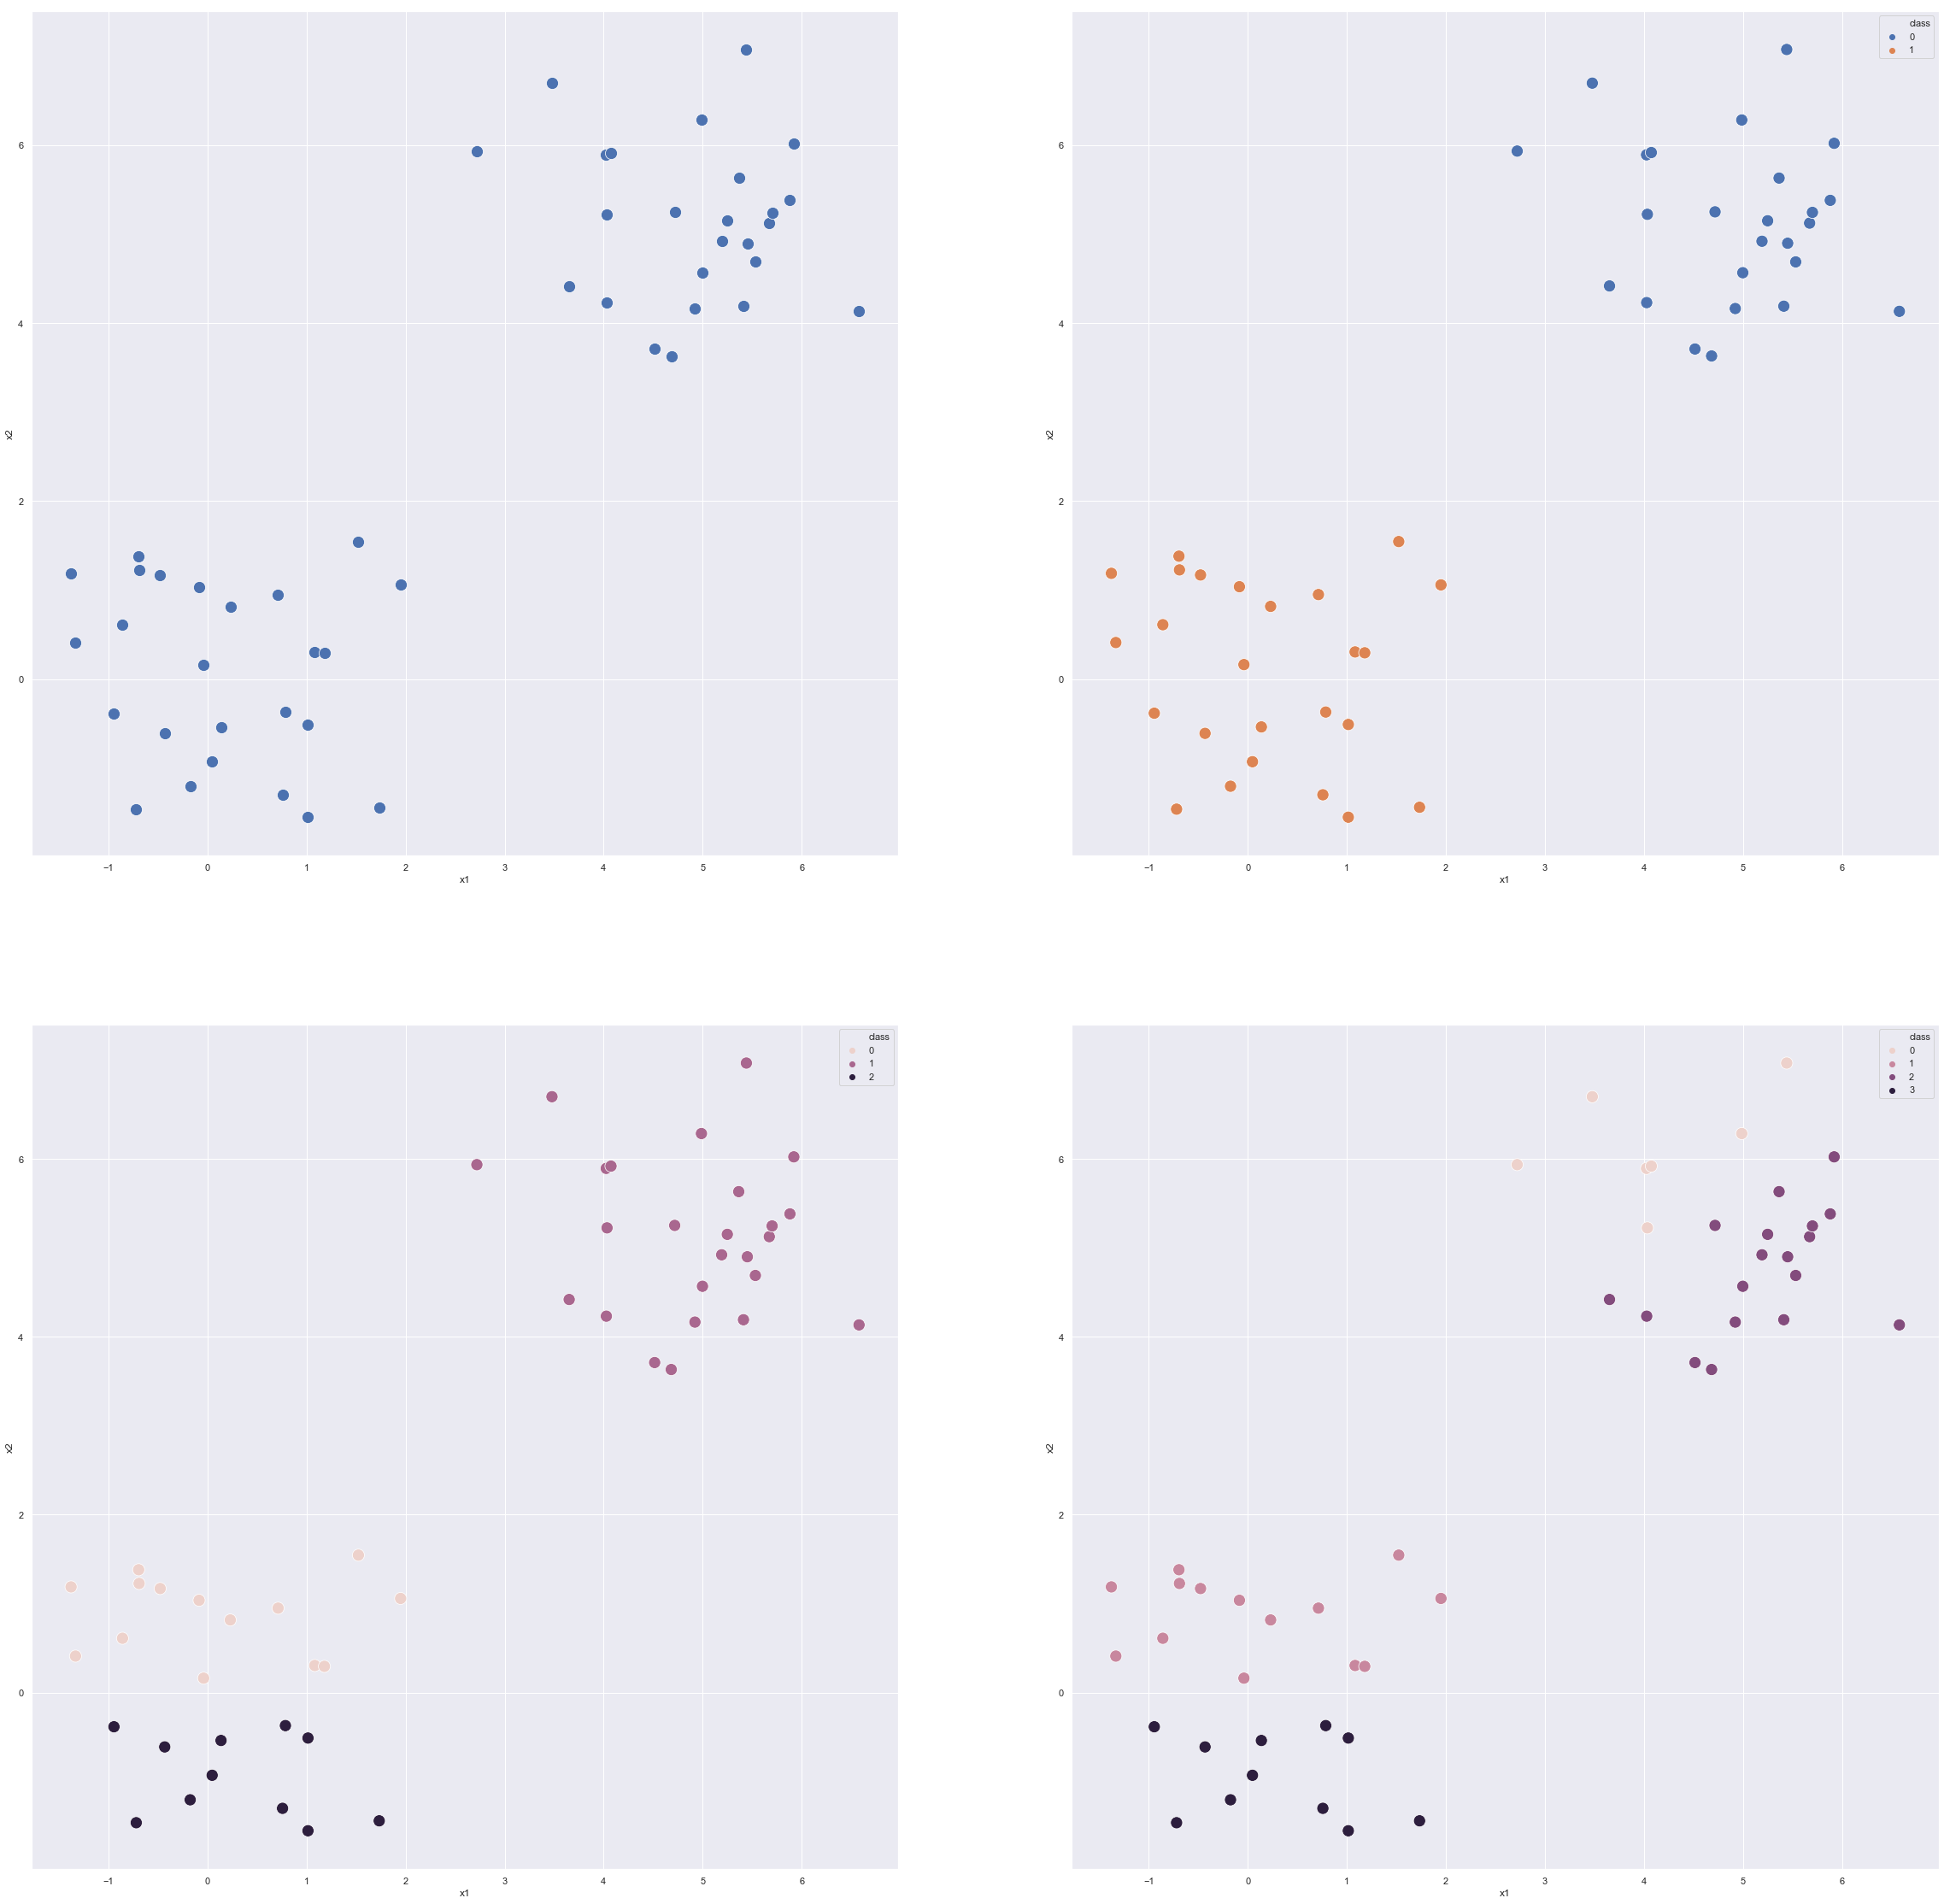

In [62]:
# generate some data with 2 clusters
toy_mtrx = np.random.normal(0, 1, (50, 2))
toy_mtrx[0:toy_mtrx.shape[0]:2] = toy_mtrx[0:toy_mtrx.shape[0]:2] + 5
toy_df = pd.DataFrame(toy_mtrx, columns=['x1', 'x2'])

_, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(40,40))

# plot points
sns.scatterplot(x='x1', y='x2', data=toy_df, ax=ax1, s=200)

# plot k=2
preds = cluster.KMeans(n_clusters=2).fit_predict(toy_df)
scatter_df = pd.concat([toy_df, pd.Series(preds).rename('class')], axis=1)
sns.scatterplot(x='x1', y='x2', hue='class', data=scatter_df, ax=ax2, s=200)

# plot k=3
preds = cluster.KMeans(n_clusters=3).fit_predict(toy_df)
scatter_df = pd.concat([toy_df, pd.Series(preds).rename('class')], axis=1)
sns.scatterplot(x='x1', y='x2', hue='class', data=scatter_df, ax=ax3, s=200)

# plot k=4
preds = cluster.KMeans(n_clusters=4).fit_predict(toy_df)
scatter_df = pd.concat([toy_df, pd.Series(preds).rename('class')], axis=1)
sns.scatterplot(x='x1', y='x2', hue='class', data=scatter_df, ax=ax4, s=200)

**Hieracrchical Clustering**

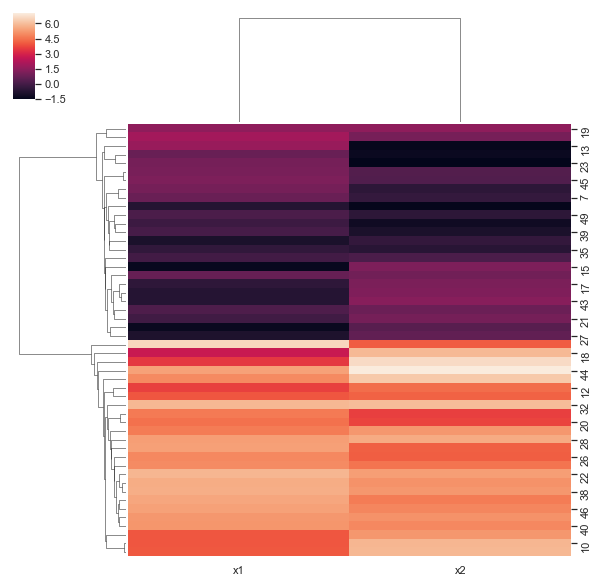

In [65]:
sns.clustermap(toy_df, metric='euclidean', method='single')

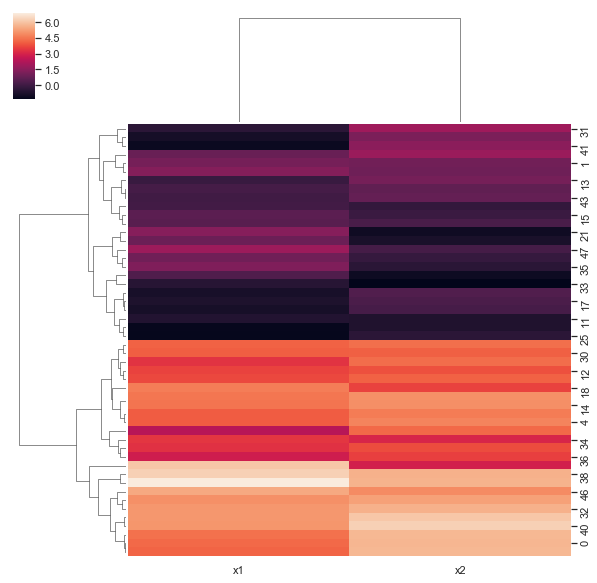

In [32]:
sns.clustermap(toy_df, metric='euclidean', method='complete')

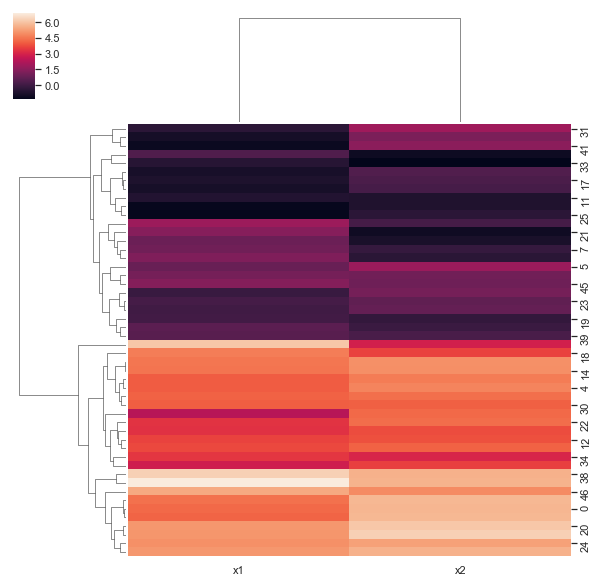

In [34]:
sns.clustermap(toy_df, metric='euclidean', method='average')

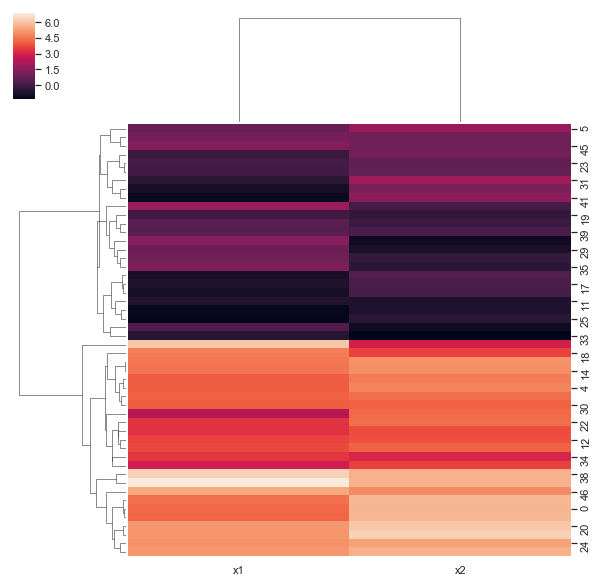

In [36]:
sns.clustermap(toy_df, metric='euclidean', method='centroid')

**NCI60**

In [96]:
nci_df = pd.read_csv('nci60.csv')
nci_dat_df = nci_df.drop([nci_df.columns[0], 'labs'], axis=1)
nci_dat_df = (nci_dat_df - nci_dat_df.mean()) / nci_dat_df.std()
nci_labs = nci_df['labs'].rename('labs')
nci_dat_df.head()

,data.1,data.2,data.3,data.4,data.5,data.6,data.7,data.8,data.9,data.10,...,data.6821,data.6822,data.6823,data.6824,data.6825,data.6826,data.6827,data.6828,data.6829,data.6830
0,0.722955,1.594615,1.315291,1.345055,-0.600101,-0.218923,0.891093,-0.861928,-1.050309,-1.050866,...,-1.022579,-0.355706,-0.236377,-0.389409,0.824850,-0.198715,-0.075074,0.516808,-0.829806,-1.373814
1,1.583897,1.739791,0.438221,0.648988,0.904746,1.635817,1.835190,2.209161,-0.095108,-0.474228,...,-0.213966,-0.620812,-0.486095,-0.794510,0.013710,-1.096743,-1.108909,-0.817192,-0.918166,-1.420219
2,2.173111,-0.016090,-0.346354,0.264375,-1.301026,-0.019170,0.189686,1.973029,1.000073,0.710403,...,0.448727,-0.249677,-0.923007,-0.861975,-0.578941,-0.328545,-0.075074,0.008636,-0.953414,-0.095086
3,0.677638,-0.372557,1.615310,-0.440814,1.234673,-0.019170,0.405503,0.791797,0.044781,0.118118,...,-1.303363,-0.452899,-0.405805,-0.085616,-0.703722,-0.490831,-1.026174,1.545855,-0.688538,-0.823895
4,1.142141,-0.577196,0.957575,1.129835,0.358517,-0.033438,0.176197,0.393131,0.545727,2.292427,...,0.712664,-1.040475,-0.722368,-0.552557,0.832648,0.488297,-0.075074,1.107557,0.521063,0.000984


Text(0,0.5,'Second Principal Component')

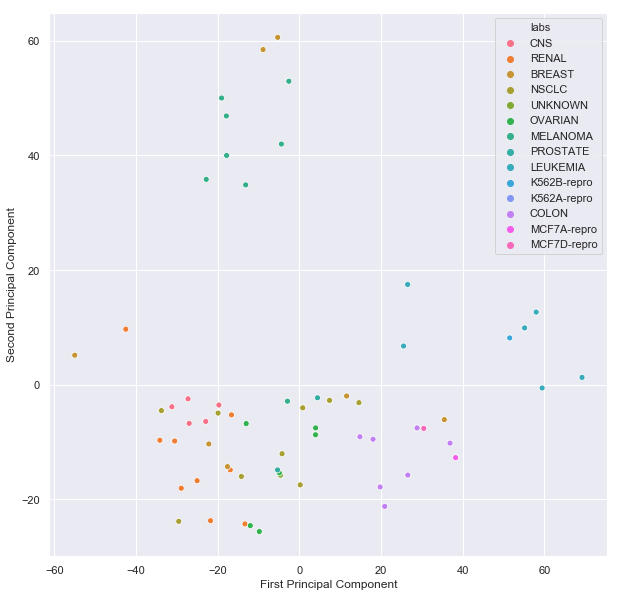

In [110]:
pca = decomposition.PCA().fit(nci_dat_df)
projections = pd.DataFrame(pca.transform(nci_dat_df))
scatter_df = pd.concat([projections, nci_labs], axis=1)

ax = sns.scatterplot(x=0,y=1,hue='labs',data=scatter_df)
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')

Text(0,0.5,'Third Principal Component')

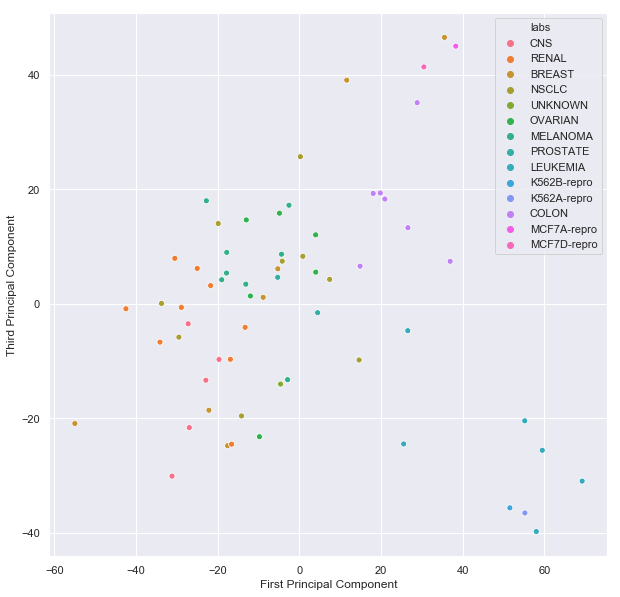

In [113]:
ax = sns.scatterplot(x=0,y=2,hue='labs',data=scatter_df)
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Third Principal Component')

Text(0,0.5,'Cumulative PVE')

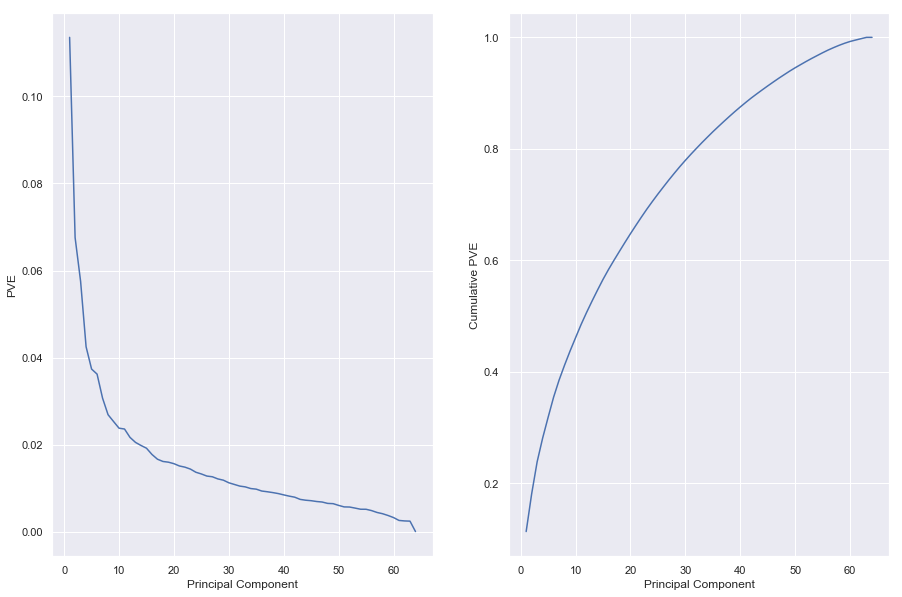

In [137]:
x = list(range(1, len(pca.explained_variance_ratio_) + 1))
y = pca.explained_variance_ratio_
_ ,(ax1, ax2) = plt.subplots(figsize=(15, 10), ncols=2)
fig1 = sns.lineplot(x=x, y=y, ax=ax1)
fig2 = sns.lineplot(x=x, y=np.cumsum(y), ax=ax2)
fig1.set_xlabel('Principal Component')
fig1.set_ylabel('PVE')
fig2.set_xlabel('Principal Component')
fig2.set_ylabel('Cumulative PVE')

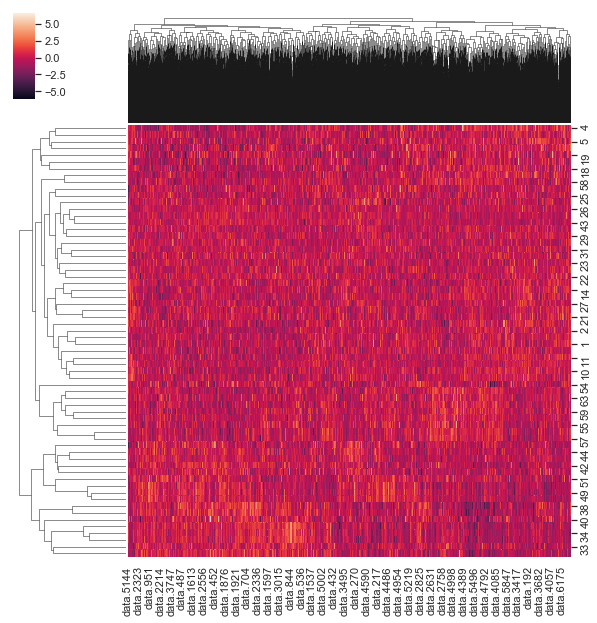

In [149]:
sns.clustermap(nci_dat_df,metric='euclidean',method='complete')

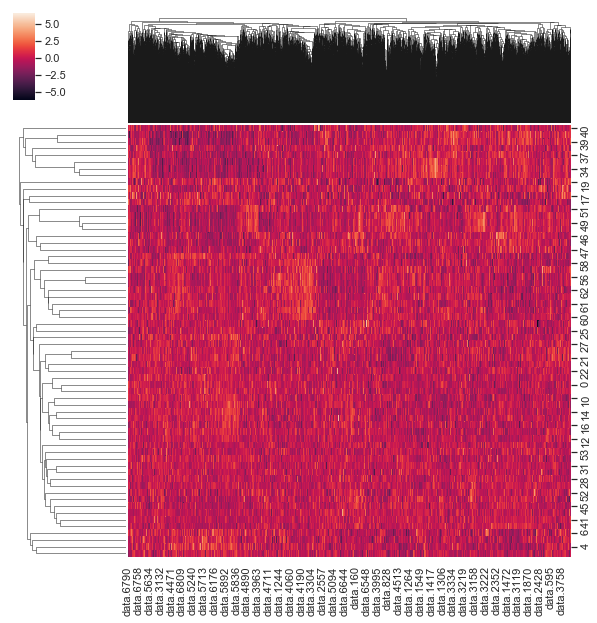

In [151]:
sns.clustermap(nci_dat_df,metric='euclidean',method='average')

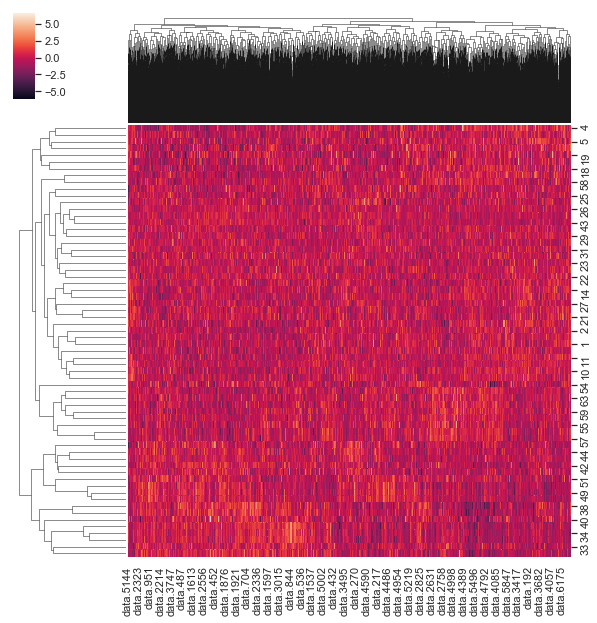

In [154]:
sns.clustermap(nci_dat_df,metric='euclidean',method='complete')